In [156]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
df=yf.download("^GSPC",start="2017-01-01",progress=False)
df["returns"]=df["Adj Close"].pct_change()
df["Log Returns"]=np.log(1+df["returns"])
df["RMS"]=df["Log Returns"]**2
media=df["RMS"].mean()
last_step=math.sqrt(media)
std=last_step*(252/1)**0.5
std=std/(math.sqrt(252))
df=df.dropna()
mean=df["returns"].mean()
# i need to find volatility and 
benchmark=[]
for h in range(len(df["Adj Close"])):
    benchmark.append(df["Adj Close"].iloc[h])


# Monte Carlo simulation on Wiener Process

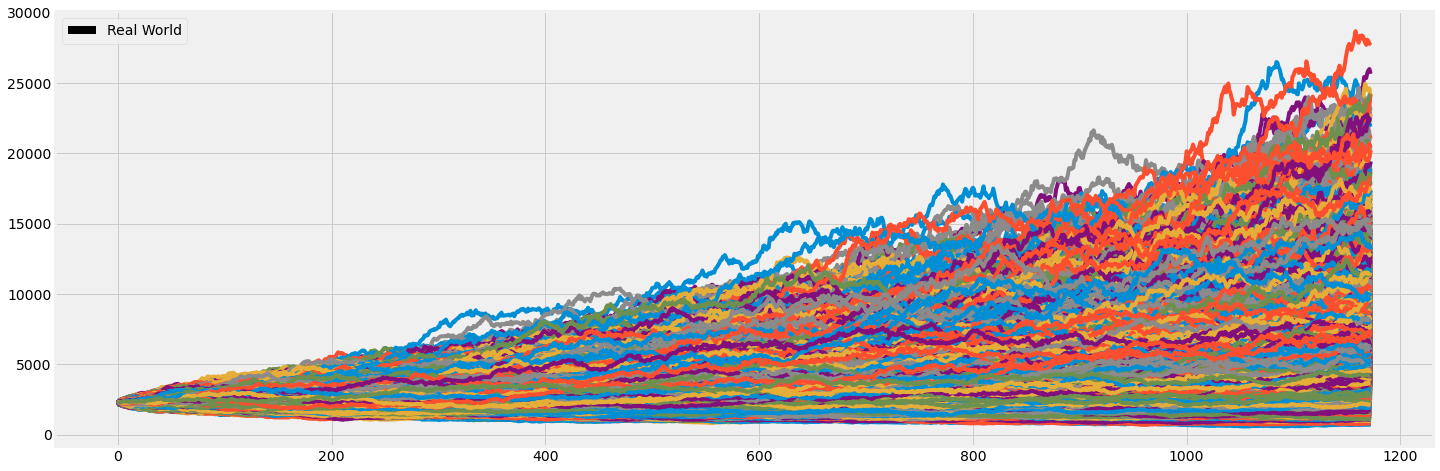

In [158]:
# via equação  langevin e fokker plank
beat=0
loss=0
plt.figure(figsize=(22,8))
plt.style.use("fivethirtyeight")
plt.plot(benchmark,color="black",linewidth=8,label="Real World")
plt.legend()
values=[df["Adj Close"][0]]
first=df["Adj Close"][0]
for b in range(100000):
    values=[df["Adj Close"][0]]
    first=df["Adj Close"][0]
    for a in range(len(df["Adj Close"])):
        first=first*(1+norm.ppf(random.random(),mean,std))
        values.append(first)
    if first>benchmark[-1]:
        beat+=1
    else:
        loss+=1
    plt.plot(values)

In [159]:
print(f"{beat/(beat+loss)*100}% curves above real world")
print(f"{loss/(beat+loss)*100}% curves below real world")

50.531000000000006% curves above real world
49.469% curves below real world
